In [2]:
import pandas as pd
data = pd.read_csv('cvrm_master.csv')
from cleaning_function import *
import numpy as np
pd.set_option('display.max_rows', 120)

/var/folders/dh/t016p6ms66zc3_d2crms5hlw0000gn/T/ipykernel_63361/3757516805.py:2: DtypeWarning: Columns (1697,1698) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cvrm_master.csv')


# Convert Numerics

In [3]:
data = drop_null_columns(data, 0.95)

In [4]:
df = data

percent_columns = [col for col in df.columns if "Percent" in col]

print("Columns to check:", percent_columns)

def standardize_percentage_column(series):
    """Detects and converts percentage values into correct decimal representation."""
    series = series.astype(str).str.replace('%', '', regex=True) 
    series = pd.to_numeric(series, errors='coerce')  

    if series.isna().all():
        return series 

    max_5_values = series.nlargest(5).values
    if all(val > 1 for val in max_5_values):
        series = series / 100  

    return series
for col in df.columns:
    if "%" in col: 
        df[col] = df[col].astype(str).str.replace('%', '', regex=True).astype(float) / 100
    elif col in percent_columns:  
        df[col] = standardize_percentage_column(df[col])

Columns to check: ['Percent_Of_Days_With_Level_Of_PM2.5_Exceeding_The_Standard_EPA2016', 'Percent_Of_Days_With_Level_Of_PM2.5_Exceeding_The_Standard_EPA2017', 'Percent_Of_Days_With_Level_Of_PM2.5_Exceeding_The_Standard_EPA2018', 'Percent_Of_Days_With_Level_Of_PM2.5_Exceeding_The_Standard_EPA2019', 'Percent_Of_Days_With_Level_Of_PM2.5_Exceeding_The_Standard_EPA2020', 'Percent_Of_Days_With_Level_Of_PM2.5_Exceeding_The_Standard_EPA2021', 'Total_population_Percent_With_Daily_Commute_Less_Than_15min_ACS2017_21', 'Total_population_Percent_With_Daily_Commute_Between_15_60min_ACS2017_21', 'Total_population_Percent_With_Daily_Commute_60min_And_Above_ACS2017_21', 'Black_AA_Single_Race_Percent_With_Daily_Commute_Less_Than_15min_ACS2017_21', 'Black_AA_Single_Race_Percent_With_Daily_Commute_Between_15_60min_ACS2017_21', 'Black_AA_Single_Race_Percent_With_Daily_Commute_60min_And_Above_ACS2017_21', 'AIAN_Single_Race_Percent_With_Daily_Commute_Less_Than_15min_ACS2017_21', 'AIAN_Single_Race_Percent_Wit

In [5]:
column_name = 'Black_AA_Single_Race_Male_Renal_Failure_Deaths_Rate_Per_100,000_Residents_CDC2018_22'
if column_name in df.columns:
    non_numeric_values = df[column_name][~df[column_name].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()].unique()
    print(f"Non-numeric values in '{column_name}':", non_numeric_values)
else:
    print(f"Column '{column_name}' not found in the dataset.")

Non-numeric values in 'Black_AA_Single_Race_Male_Renal_Failure_Deaths_Rate_Per_100,000_Residents_CDC2018_22': [nan]


In [6]:
columns_to_check = [
    'Populations_Vulnerable_to_Predicted_Surface_Smoke_from_Wildland_Fires_NOAA2020',
    'Black_AA_Single_Race_Female_Renal_Failure_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'Black_AA_Single_Race_Male_Renal_Failure_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'White_Single_Race_Female_Renal_Failure_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'White_Single_Race_Male_Renal_Failure_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'Black_AA_Single_Race_Female_CVD_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'Black_AA_Single_Race_Male_CVD_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'White_Single_Race_Female_CVD_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'White_Single_Race_Male_CVD_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'Asian_Single_Race_Female_CVD_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'Asian_Single_Race_Male_CVD_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'Black_AA_Single_Race_Female_Diabetes_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'Black_AA_Single_Race_Male_Diabetes_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'White_Single_Race_Female_Diabetes_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'White_Single_Race_Male_Diabetes_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'Black_AA_Single_Race_Female_Hypertension_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'Black_AA_Single_Race_Male_Hypertension_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'White_Single_Race_Female_Hypertension_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'White_Single_Race_Male_Hypertension_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'White_Single_Race_Female_Obesity_and_Hyperalimentation_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'White_Single_Race_Male_Obesity_and_Hyperalimentation_Deaths_Rate_Per_100,000_Residents_CDC2018_22',
    'Number_of_hospitals_County_CDCnehTracking_2020',
    'Number_of_Pharmacies_available_per100000_CDCnehTracking_2016_20'
]

from collections import Counter
all_values = []

for col in columns_to_check:
    if col in df.columns:
        try:
            values = df[col].dropna().astype(str).tolist()
            all_values.extend(values)
        except Exception as e:
            print(f"Error processing column {col}: {e}")
value_counts = Counter(all_values)
top_10_common_values = value_counts.most_common(10)
top_10_df = pd.DataFrame(top_10_common_values, columns=["Value", "Count"])
top_10_df

,Value,Count
0,1.0,1476
1,2.0,452
2,3.0,167
3,4.0,97
4,5.0,61
5,6.0,51
6,15.0,45
7,8.0,44
8,7.0,42
9,24.3,41


In [7]:
replace_with_nan = ["Data Not Collected", "No Counts", "Not Available", "Unreliable"]

for col in columns_to_check:
    try:
        df[col] = df[col].replace(replace_with_nan, np.nan)
    except KeyError:
        pass

for col in columns_to_check:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except ValueError:
        pass 
    except KeyError:
        pass



In [8]:
non_numeric = df.select_dtypes(exclude = [np.number])
non_numeric

,statecounty_x,mapped_match,stname,name,Code,State,County [2],County Seat(s) [3],Water Area km²,Water Area mi²
0,01autauga,01autauga,Alabama,Autauga,01autauga,AL,Autauga,Prattville,25.776,9.952
1,01baldwin,01baldwin,Alabama,Baldwin,01baldwin,AL,Baldwin,Bay Minette,1133.19,437.527
2,01barbour,01barbour,Alabama,Barbour,01barbour,AL,Barbour,Clayton,50.865,19.639
3,01bibb,01bibb,Alabama,Bibb,01bibb,AL,Bibb,Centreville,9.289,3.587
4,01blount,01blount,Alabama,Blount,01blount,AL,Blount,Oneonta,15.157,5.852
...,...,...,...,...,...,...,...,...,...,...
3138,56sweetwater,56sweetwater,Wyoming,Sweetwater,56sweetwater,WY,Sweetwater,Green River,166.887,64.436
3139,56teton,56teton,Wyoming,Teton,56teton,WY,Teton,Jackson,572.266,220.953
3140,56uinta,56uinta,Wyoming,Uinta,56uinta,WY,Uinta,Evanston,16.342,6.31
3141,56washakie,56washakie,Wyoming,Washakie,56washakie,WY,Washakie,Worland,10.762,4.155


In [9]:
columns_to_clean = ['Latitude', 'Longitude']
for col in columns_to_clean:
    df[col] = df[col].astype(str)
    df[col] = (
        df[col]
        .str.replace('°', '', regex=False)  
        .str.replace('+', '', regex=False)  
        .str.replace('−', '-', regex=False)  
        .str.replace('–', '-', regex=False)  
    )
    df[col] = pd.to_numeric(df[col])



In [10]:
# df.to_csv('cvrm_master.csv', index = False)

# FAISS

In [11]:
cvrm_keywords = [
    "heart", "cardio", "stroke", "hypertension", "diabetes", "renal", "kidney", 
    "cholesterol", "blood pressure", "glucose", "insulin", "lipid", "triglyceride", 'cvd'
]
numeric_columns = df.select_dtypes(include=[np.number]).columns
cvrm_columns = [col for col in numeric_columns if any(keyword in col for keyword in cvrm_keywords)]
print("CVRM-related numeric columns:", cvrm_columns)


CVRM-related numeric columns: ['HealthOutcome_percent_pop_with_highcholesterol_PLACES_BRFSS_2021', 'HealthOutcome_percent_pop_with_stroke_PLACES_BRFSS_2021', 'HealthOutcome_percent_pop_with_chronic_kidney_diseases_Places_BRFSS_2021', 'HealthOutcome_percent_pop_with_hypertension_PLACES_BRFSS_2021', 'HealthOutcome_percent_pop_with_coronary_heart_diseases_PLACES_BRFSS_2021', 'percent_pop_with_cholesterol_screening_Places_BRFSS_2021', 'percent_pop_taking_medicacine_for_hypertension_control_Places_BRFSS_2021']


In [12]:
import faiss
cvrm_data = df[cvrm_columns].dropna().to_numpy().astype('float32')
index = faiss.IndexFlatL2(cvrm_data.shape[1])
index.add(cvrm_data)
query_vector = cvrm_data[0].reshape(1, -1)
k = 5
distances, indices = index.search(query_vector, k)
print("Distances:", distances)
print("Indices of closest matches:", indices)

Distances: [[0.        1.900011  2.0600028 2.189995  2.199999 ]]
Indices of closest matches: [[   0 1371   18   33 2809]]


In [13]:
df[cvrm_columns].isnull().sum()

HealthOutcome_percent_pop_with_highcholesterol_PLACES_BRFSS_2021            67
HealthOutcome_percent_pop_with_stroke_PLACES_BRFSS_2021                     67
HealthOutcome_percent_pop_with_chronic_kidney_diseases_Places_BRFSS_2021    67
HealthOutcome_percent_pop_with_hypertension_PLACES_BRFSS_2021               67
HealthOutcome_percent_pop_with_coronary_heart_diseases_PLACES_BRFSS_2021    67
percent_pop_with_cholesterol_screening_Places_BRFSS_2021                    67
percent_pop_taking_medicacine_for_hypertension_control_Places_BRFSS_2021    67
dtype: int64

In [14]:
renal_col = include_columns(df, ['renal'])
renal_col

,Black_AA_Single_Race_Female_Percent_of_Renal_Failure_In_Total_Deaths_CDC2018_22_x,Black_AA_Single_Race_Male_Percent_of_Renal_Failure_In_Total_Deaths_CDC2018_22_x,White_Single_Race_Female_Percent_of_Renal_Failure_In_Total_Deaths_CDC2018_22_x,White_Single_Race_Male_Percent_of_Renal_Failure_In_Total_Deaths_CDC2018_22_x,"Black_AA_Single_Race_Female_Renal_Failure_Deaths_Rate_Per_100,000_Residents_CDC2018_22","Black_AA_Single_Race_Male_Renal_Failure_Deaths_Rate_Per_100,000_Residents_CDC2018_22","White_Single_Race_Female_Renal_Failure_Deaths_Rate_Per_100,000_Residents_CDC2018_22","White_Single_Race_Male_Renal_Failure_Deaths_Rate_Per_100,000_Residents_CDC2018_22",Black_AA_Single_Race_Female_Renal_Failure_Deaths_Counts_CDC2018_22_x,Black_AA_Single_Race_Male_Renal_Failure_Deaths_Counts_CDC2018_22_x,White_Single_Race_Female_Renal_Failure_Deaths_Counts_CDC2018_22_x,White_Single_Race_Male_Renal_Failure_Deaths_Counts_CDC2018_22_x,Asian_Single_Race_Female_Renal_Failure_Deaths_Counts_CDC2018_22_x,Asian_Single_Race_Male_Renal_Failure_Deaths_Counts_CDC2018_22_x,NHPI_Single_Race_Female_Renal_Failure_Deaths_Counts_CDC2018_22_x,NHPI_Single_Race_Male_Renal_Failure_Deaths_Counts_CDC2018_22_x
0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,23.4,NaN,11.0,17.0,24.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,NaN,50.5,16.0,23.6,12.0,24.0,79.0,110.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,16.0,16.0,15.0,NaN,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,NaN,NaN,0.0,0.0,NaN,NaN,18.6,22.6,NaN,NaN,24.0,28.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
columns_with_2020_2021 = [col for col in df.columns if '2020' in col or '2021' in col or '2019' in col]
len(columns_with_2020_2021)
# no single race, 


294

In [16]:
columns_single = [col for col in df.columns if 'Single_Race' in col]
len(columns_single)

1097

# GraphSage

In [17]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.neighbors import kneighbors_graph
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv

data = drop_null_columns(data, 0.6)

missing_mask = data.isnull()
data_df = data.copy()
data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

categorical_cols = data_df.select_dtypes(include=['object']).columns
data_df[categorical_cols] = data_df[categorical_cols].fillna('missing').astype('category').apply(lambda x: x.cat.codes)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_rmse = []

for fold, (train_idx, test_idx) in enumerate(kf.split(data_df)):
    print(f"Starting Fold {fold + 1}")
    train_data, test_data = data_df.iloc[train_idx], data_df.iloc[test_idx]
    missing_mask_train = missing_mask.iloc[train_idx]
    missing_mask_test = missing_mask.iloc[test_idx]

    imputer = SimpleImputer(strategy="mean")
    train_data_imputed = imputer.fit_transform(train_data)
    test_data_imputed = imputer.transform(test_data)

    scaler = StandardScaler()
    train_data_scaled = scaler.fit_transform(train_data_imputed)
    test_data_scaled = scaler.transform(test_data_imputed)

    pca = PCA(n_components=20)
    train_reduced = pca.fit_transform(train_data_scaled)
    test_reduced = pca.transform(test_data_scaled)

    train_tensor = torch.tensor(train_reduced, dtype=torch.float)
    test_tensor = torch.tensor(test_reduced, dtype=torch.float)

    adjacency_matrix = kneighbors_graph(train_tensor.numpy(), n_neighbors=10, mode='connectivity')
    edge_index = torch.tensor(adjacency_matrix.nonzero(), dtype=torch.long)

    valid_mask = (edge_index[0] < train_tensor.shape[0]) & (edge_index[1] < train_tensor.shape[0])
    edge_index = edge_index[:, valid_mask]

    graph_data = Data(x=train_tensor, edge_index=edge_index)

    class GraphSAGEModel(nn.Module):
        def __init__(self, input_dim, hidden_dim, output_dim):
            super(GraphSAGEModel, self).__init__()
            self.conv1 = SAGEConv(input_dim, hidden_dim)
            self.conv2 = SAGEConv(hidden_dim, output_dim)
            self.relu = nn.ReLU()

        def forward(self, x, edge_index):
            x = self.conv1(x, edge_index)
            x = self.relu(x)
            x = self.conv2(x, edge_index)
            return x

    input_dim = train_tensor.shape[1]
    model = GraphSAGEModel(input_dim, hidden_dim=64, output_dim=input_dim)
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    criterion = nn.MSELoss()

    model.train()
    for epoch in range(10):
        optimizer.zero_grad()
        out = model(train_tensor, graph_data.edge_index)
        mask = torch.from_numpy(missing_mask_train.values[:, :train_tensor.shape[1]] == 1).to(torch.bool)
        loss = criterion(out[mask], train_tensor[mask])
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        optimizer.step()
        print(f"Fold {fold + 1}, Epoch {epoch + 1}, Loss: {loss.item()}")

    model.eval()
    with torch.no_grad():
        test_adjacency_matrix = kneighbors_graph(test_reduced, n_neighbors=10, mode='connectivity')
        test_edge_index = torch.tensor(np.array(test_adjacency_matrix.nonzero()), dtype=torch.long)
        test_graph_data = Data(x=test_tensor, edge_index=test_edge_index)
        test_predictions = model(test_tensor, test_graph_data.edge_index)
        
        print(f"Max index in edge_index: {edge_index.max().item()}, Num nodes: {train_tensor.shape[0]}")
        test_mask = torch.from_numpy(missing_mask_test.values[:, :test_tensor.shape[1]] == 1).to(torch.bool)
        mse = criterion(test_predictions[test_mask], test_tensor[test_mask])
        rmse = torch.sqrt(mse).item()
        all_rmse.append(rmse)
        print(f"Fold {fold + 1} RMSE: {rmse}")

print(f"Average RMSE across all folds: {sum(all_rmse) / len(all_rmse)}")



Starting Fold 1


/var/folders/dh/t016p6ms66zc3_d2crms5hlw0000gn/T/ipykernel_63361/3726100679.py:49: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  edge_index = torch.tensor(adjacency_matrix.nonzero(), dtype=torch.long)


Fold 1, Epoch 1, Loss: 74.92111206054688
Fold 1, Epoch 2, Loss: 64.80915832519531
Fold 1, Epoch 3, Loss: 55.623863220214844
Fold 1, Epoch 4, Loss: 47.37615966796875
Fold 1, Epoch 5, Loss: 39.936485290527344
Fold 1, Epoch 6, Loss: 33.314117431640625
Fold 1, Epoch 7, Loss: 27.443988800048828
Fold 1, Epoch 8, Loss: 22.319316864013672
Fold 1, Epoch 9, Loss: 17.932706832885742
Fold 1, Epoch 10, Loss: 14.284684181213379
Max index in edge_index: 2513, Num nodes: 2514
Fold 1 RMSE: 5.319729804992676
Starting Fold 2
Fold 2, Epoch 1, Loss: 102.28321838378906
Fold 2, Epoch 2, Loss: 93.2872543334961
Fold 2, Epoch 3, Loss: 84.78983306884766
Fold 2, Epoch 4, Loss: 76.78462982177734
Fold 2, Epoch 5, Loss: 69.27589416503906
Fold 2, Epoch 6, Loss: 62.2703857421875
Fold 2, Epoch 7, Loss: 55.77309036254883
Fold 2, Epoch 8, Loss: 49.75395965576172
Fold 2, Epoch 9, Loss: 44.18770980834961
Fold 2, Epoch 10, Loss: 39.10822296142578
Max index in edge_index: 2513, Num nodes: 2514
Fold 2 RMSE: 5.352843284606934


In [18]:
print(mask.shape)
print(mask.sum())  # To check how many values are selected by the mask


torch.Size([2515, 20])
tensor(48)


In [19]:
missing_mask_test_tensor = torch.tensor(missing_mask_test.values, dtype=torch.bool)
print(torch.isnan(missing_mask_test_tensor).any())  # Check for NaNs


print(torch.isnan(test_tensor).any())  # Check if any NaNs in the tensor



tensor(False)
tensor(False)


In [20]:
print(torch.isnan(test_predictions).any())  # Check for NaNs in predictions
print(test_predictions.max(), test_predictions.min())  # Check for extreme values



tensor(False)
tensor(25.5286) tensor(-42.4267)


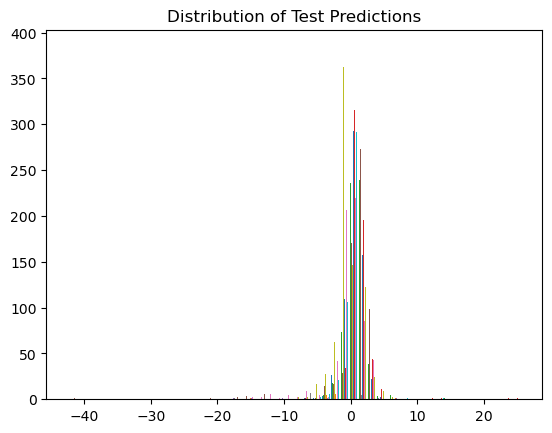

In [21]:

import matplotlib.pyplot as plt

plt.hist(test_predictions.cpu().numpy(), bins=50)
plt.title("Distribution of Test Predictions")
plt.show()
